### Infosys Puzzle

In [1]:
import pandas as pd

In [10]:
puzzle = pd.read_csv('./data/puzzle1.csv')
puzzle

,id,formula,value
0,1,1+4,10
1,2,2+1,5
2,3,3-2,40
3,4,4-1,20


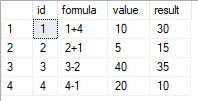

In [3]:
from IPython import display
display.Image("./data/puzzle1.PNG")

In [11]:
puzzle['o'] = puzzle['formula'].apply(lambda x:x[1])
puzzle['b'] = puzzle['formula'].apply(lambda x:int(x[-1]))
puzzle

,id,formula,value,o,b
0,1,1+4,10,+,4
1,2,2+1,5,+,1
2,3,3-2,40,-,2
3,4,4-1,20,-,1


In [15]:
merged_data = pd.merge(puzzle,puzzle,left_on='b',right_on='id')[['id_x','formula_x','value_x','o_x','value_y']]
merged_data

,id_x,formula_x,value_x,o_x,value_y
0,1,1+4,10,+,20
1,2,2+1,5,+,10
2,4,4-1,20,-,10
3,3,3-2,40,-,5


In [21]:
def operation(df):
    if df['o_x']=='+':
        return df['value_x']+df['value_y']
    elif df['o_x']=='-':
        return df['value_x']-df['value_y']
merged_data = merged_data.assign(result = lambda df: df.apply(operation,axis=1)).sort_values('id_x')
merged_data = merged_data[['id_x','formula_x','value_x','result']].rename(columns={'id_x':'id','formula_x':'formula','value_x':'value'})
merged_data

,id,formula,value,result
0,1,1+4,10,30
1,2,2+1,5,15
3,3,3-2,40,35
2,4,4-1,20,10
